<a href="https://colab.research.google.com/github/loaiwalid07/main/blob/main/Tweets_Analysis_From_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tweets Analysis From Twitter**

In [ ]:
!pip install -q contextily

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re
import string
import nltk
from nltk.corpus import stopwords
#import contextily as cx

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data=pd.read_csv("Final_Kia.csv")

In [ ]:
data

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Age,Gender,Org
0,0,1233904773616656385,1233902822522884096,2020-03-01 01:59:57 Egypt Standard Time,2020-03-01,01:59:57,200,1142486779133485056,an1ndyarr,Anin.,NaN,"@kia_ehhkia nih urang baiq, 💜😅",in,[],[],[],0,0,0,[],[],https://twitter.com/an1ndyarr/status/123390477...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,<=18,male,non-org
1,1,1233904745070419970,1233690769594224644,2020-03-01 01:59:50 Egypt Standard Time,2020-03-01,01:59:50,200,1087745586642763776,koondharmehmood,Mehmood Koondhar,NaN,@NasirShahOffice @BBhuttoZardari @SyedNasirHSh...,hi,[],[],[],0,0,0,[],[],https://twitter.com/KoondharMehmood/status/123...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NasirShahOffice', 'name': ""S...",NaN,NaN,NaN,NaN,>=40,male,non-org
2,2,1233904563419144192,1233777413907087360,2020-03-01 01:59:07 Egypt Standard Time,2020-03-01,01:59:07,200,1128126416409640960,rrj1705,🌻RRJ🌏🕊,NaN,@_kiatakahashi Gudluck Kia gudmorning😘 #KiaraT...,tl,[],[],[],0,0,0,['kiaratakahashi'],[],https://twitter.com/RRJ1705/status/12339045634...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '_kiatakahashi', 'name': 'Kia...",NaN,NaN,NaN,NaN,19-29,male,non-org
3,3,1233904513070878722,1233837573967089665,2020-03-01 01:58:55 Egypt Standard Time,2020-03-01,01:58:55,200,708093688086286336,boatbaggybagg,jafek,NaN,"@kia_lynee My fav villagers are scoot, bob, an...",en,[],[],[],0,0,0,[],[],https://twitter.com/boatbaggybagg/status/12339...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kia_lynee', 'name': 'kia 🖤',...",NaN,NaN,NaN,NaN,<=18,male,non-org
4,4,1233904512911409156,1233894167434190849,2020-03-01 01:58:55 Egypt Standard Time,2020-03-01,01:58:55,200,1231234703006556163,arzurajput12,(shehnazian)❤💙💜,NaN,@yaman_parmar Hahaha kia nhi tmhy n bol rhi me...,tl,[],[],[],0,0,0,[],[],https://twitter.com/ArzuRajput12/status/123390...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'yaman_parmar', 'name': 'Neha...",NaN,NaN,NaN,NaN,<=18,female,non-org
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,5012,1233759718998446081,1233746617485885440,2020-02-29 16:23:33 Egypt Standard Time,2020-02-29,16:23:33,200,340377094,drimtiaz86,Dr. Imtiaz Ahmad,NaN,@AhmadShaheen Kio corona nahe ha Kia,in,[],[],[],1,0,1,[],[],https://twitter.com/drimtiaz86/status/12337597...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'AhmadShaheen', 'name': 'Ahma...",NaN,NaN,NaN,NaN,30-39,male,non-org
5013,5013,1233759710936891392,1233731997366833152,2020-02-29 16:23:31 Egypt Standard Time,2020-02-29,16:23:31,200,1153164362502119425,autumnjewel116,Autumnjewel¹⁹⁹⁶,NaN,@likeabird191 @Mochi985 @YGlacondixaolol Chắc ...,vi,[],[],[],0,0,0,[],[],https://twitter.com/autumnjewel116/status/1233...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'likeabird191', 'name': 'Cỏ B...",NaN,NaN,NaN,NaN,<=18,female,non-org
5014,5014,1233759695942438912,1233733935798083584,2020-02-29 16:23:28 Egypt Standard Time,2020-02-29,16:23:28,200,912249110048202752,itx_diya,Dania🇵🇰,NaN,@GoSleepBilal @50shadesofzooya @Gosleepmemo @U...,in,[],[],[],2,0,1,[],[],https://twitter.com/itx_Diya/status/1233759695...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '50shadesofzooya', 'name': 'Z...",NaN,NaN,NaN,NaN,<=18,female,non-org
5015,5015,1233759686001713153,1233757795943452675,2020-02-29 16:23:25 Egypt Standard Time,2020-02-29,16:23:25,200,1102077191091761152,lostmyseok,"kia, close",NaN,@kim_liaaaa aku kia unch,in,[],[],[],1,0,0,[],[],https://twitter.com/lostmyseok/status/12337596...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

**Extract retweet and likes**

In [ ]:
max(data["likes_count"])
max(data["retweets_count"])

276

In [ ]:
hash=[]
final_ha=[]
symbols = ['.', '£', '-', '!', '(', ')', ':',"'",']','[']
for i in range(len(data["hashtags"])):
  if data["hashtags"][i] != '[]':
    for j in symbols:
      data["hashtags"][i]=data["hashtags"][i].replace(j,'')    
    hash.append(data["hashtags"][i].split(","))
for i in range(len(hash)):
  for j in range(len(hash[i])):
    final_ha.append(hash[i][j])
len(np.unique(np.array(final_ha)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



707

In [ ]:
# removing short words/ punctuation
data["tweet"]= data["tweet"].apply(lambda x: " ".join ([w for w in x.split() if len (w)>3]))
for i in range (len(data["tweet"])):
  data["tweet"][i] = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", data["tweet"][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data["tweet"]

0                                              urang baiq
1          SAEINShaheed ZABhutto sbkehty BHUTTO HONaur...
2                       Gudluck gudmorning KiaraTakahashi
3           villagers scoot bob cherry Cant wait Horizons
4        Hahaha tmhy song continue tmhy faltu khush hogay
                              ...                        
5012                                          corona nahe
5013                           191 85  Chắc vậy thối thật
5014                     50shadesofzooya   Insta krti abi
5015                                                 unch
5016                                   8 MashaAllah stail
Name: tweet, Length: 5017, dtype: object

In [ ]:
# tokenize the data

def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens
data["tweet"]= data["tweet"].apply (lambda x: tokenize(x.lower()))

In [ ]:
data["tweet"]

0                                         [, urang, baiq]
1       [, saeinshaheed, zabhutto, sbkehty, bhutto, ho...
2                 [, gudluck, gudmorning, kiaratakahashi]
3       [, villagers, scoot, bob, cherry, cant, wait, ...
4       [, hahaha, tmhy, song, continue, tmhy, faltu, ...
                              ...                        
5012                                     [, corona, nahe]
5013                     [191, 85, chắc, vậy, thối, thật]
5014                [, 50shadesofzooya, insta, krti, abi]
5015                                             [, unch]
5016                               [8, mashaallah, stail]
Name: tweet, Length: 5017, dtype: object

In [ ]:
# remove stopwords
stop_words=set(stopwords.words("english"))
def remove_stopword(text):
    text_nostopword= [char for char in text if char not in stop_words]
    return text_nostopword

data["tweet"]= data["tweet"].apply(lambda x: remove_stopword(x))

In [ ]:
# stemming 
ps = nltk.stem.porter.PorterStemmer()
def stem(tweet_no_stopword):
   text = [ps.stem ( word) for word in tweet_no_stopword]
   return text

data["tweet"]= data["tweet"].apply(lambda x: stem(x))

In [ ]:
data.tweet

0                                         [, urang, baiq]
1       [, saeinshahe, zabhutto, sbkehti, bhutto, hona...
2                    [, gudluck, gudmorn, kiaratakahashi]
3       [, villag, scoot, bob, cherri, cant, wait, hor...
4       [, hahaha, tmhi, song, continu, tmhi, faltu, k...
                              ...                        
5012                                     [, corona, nahe]
5013                     [191, 85, chắc, vậi, thối, thật]
5014                [, 50shadesofzooya, insta, krti, abi]
5015                                             [, unch]
5016                               [8, mashaallah, stail]
Name: tweet, Length: 5017, dtype: object

[('kia', 352), ('nahi', 241), ('hai', 186), ('main', 182), ('sana', 158), ('villag', 155), ('hain', 148), ('love', 141), ('kuch', 140), ('favorit', 134), ('bhai', 129), ('tweet', 123), ('like', 109), ('baat', 102), ('raha', 99), ('kisi', 95), ('mein', 92), ('1', 92), ('hota', 91), ('sath', 88)]


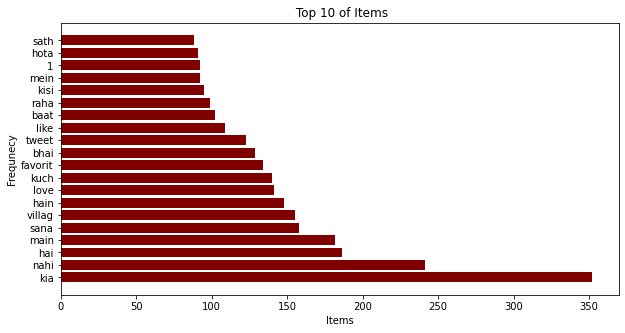

In [ ]:
from collections import Counter
symbols = ['.', '£', '-', '!', '(', ')', ':', ',',"'",']','[']
data_set=data["tweet"]
# split() returns list of all the words in the string
l=""
for i in range(len(data_set)):
  l= l + str(data_set[i])
for i in symbols:
  l=l.replace(i,'')

split_it = l.split()

# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(20)
  
print(most_occur)
item = []
values = []
for i,j in most_occur:
  item.append(i)
  values.append(j)
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.barh(item, values, color ='maroon',)

plt.xlabel("Items")
plt.ylabel("Frequnecy")
plt.title(" Top 10 of Items")
plt.show()

In [ ]:
from nltk import FreqDist

freq_dist_pos = FreqDist(split_it).most_common(10)
#print(freq_dist_pos.most_common(10))
freq_dist_pos

[('kia', 352),
 ('nahi', 241),
 ('hai', 186),
 ('main', 182),
 ('sana', 158),
 ('villag', 155),
 ('hain', 148),
 ('love', 141),
 ('kuch', 140),
 ('favorit', 134)]

In [ ]:
fig = px.bar(x=item,y= values,text=values,color=item,width=700,title="most words")
fig.show()

**Sentiment analysis**

In [ ]:
!python -m textblob.download_corpora
from textblob import TextBlob

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
def get_tweet_sentiment(tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(tweet)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
  

In [ ]:
ss=[]
for i in range(len(data_set)):
  ss.append(get_tweet_sentiment(str(data_set.iloc[i])))

[('neutral', 3979), ('positive', 769), ('negative', 269)]


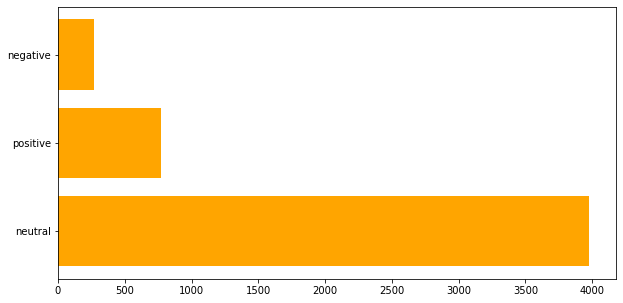

In [ ]:
Counter_sen = FreqDist(ss)
most_sen = Counter_sen.most_common(10)
  
print(most_sen)
item_s = []
values_s = []
for i,j in most_sen:
  item_s.append(i)
  values_s.append(j)
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.barh(item_s, values_s, color ='orange',)
plt.show()

**Geo Plot**

In [ ]:
# Required packages
import pandas as pd
#import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

data = dict(type = 'choropleth', 
            locations = ['AL', 'AK', 'AR', 'CA'], 
            locationmode = 'USA-states', 
            z = [1,2,30,40,50], 
            text = ['alabama', 'alaska', 'arizona', 'pugger', 'california'])

In [ ]:

layout = dict(geo = {'scope':'usa'})

In [ ]:
x = pg.Figure(data = [data] , 
              layout = layout)
po.iplot(x)